In [188]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
import seaborn as sns
sns.set_theme(color_codes=True)
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import json

# Preparing Data

In [3]:
first_round_perfornance = pd.read_csv('Data/first_round_final_performance.csv',index_col= 0)
# first_round_perfornance.columns = ['mturkID', 'first_go2avoidPun', 'first_go2win', 'first_nogo2avoidPun', 'first_nogo2win']
second_round_perfornance = pd.read_csv('Data/second_round_final_performance.csv',index_col= 0)
# second_round_perfornance.columns = ['mturkID', 'second_go2avoidPun', 'second_go2win', 'second_nogo2avoidPun', 'second_nogo2win']


In [66]:
all_performance = pd.merge(second_round_perfornance, first_round_perfornance, on = 'mturkID', how = 'left')
all_performance.gender_second_session = all_performance.gender_second_session.map({'female':'female','other':'female','male':'male'})
all_performance.gender_first_session = all_performance.gender_first_session.map({'female':'female','other':'female','male':'male'})
all_performance = all_performance.drop_duplicates()

# First Hypothesis
1. Our first hypothesis is that Pavlovian bias in learning is a stable, trait-like characteristic of human agents. 

In [67]:
all_performance['first_rel_nogo2win'] = all_performance['go2win_first_session'] - all_performance['nogo2win_first_session'] 
all_performance['second_rel_nogo2win'] = all_performance['go2win_second_session'] - all_performance['nogo2win_second_session'] 

all_performance['first_rel_nogo2avoidPun'] = all_performance['go2win_first_session'] - all_performance['nogo2avoidPun_first_session']
all_performance['second_rel_nogo2avoidPun'] = all_performance['go2win_second_session'] - all_performance['nogo2avoidPun_second_session'] 


# No Go to Win Conditions

### Absolute performance

In [190]:
test_res = stats.pearsonr(all_performance.nogo2win_first_session, all_performance.nogo2win_second_session)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.3765645776592518
p-value:  0.015236990672853798


<AxesSubplot:xlabel='nogo2win_first_session', ylabel='nogo2win_second_session'>

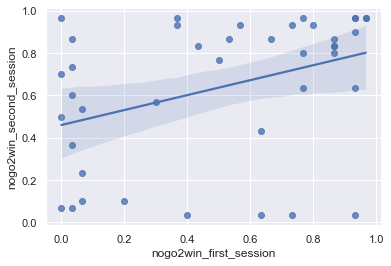

In [191]:
sns.regplot(x = all_performance.nogo2win_first_session, y = all_performance.nogo2win_second_session)

In [193]:
smf.ols(formula = 'nogo2win_second_session ~ nogo2win_first_session', data = all_performance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     nogo2win_second_session   R-squared:                       0.142
Model:                                 OLS   Adj. R-squared:                  0.120
Method:                      Least Squares   F-statistic:                     6.444
Date:                     Sat, 11 Dec 2021   Prob (F-statistic):             0.0152
Time:                             15:51:46   Log-Likelihood:                -10.150
No. Observations:                       41   AIC:                             24.30
Df Residuals:                           39   BIC:                             27.73
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4601      0.086      5.369      0.000       0.287       0.633
nogo2win_first_session     0.3529      0.139      2.539      0.015       0.072       0.634
==============================================================================
Omnibus:                        5.858   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.478
Skew:                          -0.894   Prob(JB):                       0.0647
Kurtosis:                       2.909   Cond. No.                         3.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Relative performace

In [71]:
test_res = stats.pearsonr(all_performance.first_rel_nogo2win, all_performance.second_rel_nogo2win)
print('correlation between first and second round actual performance: ', test_res[0])
print('p-value: ', test_res[1])

correlation between first and second round actual performance:  0.3257279745282606
p-value:  0.037688065963665744


<AxesSubplot:xlabel='first_rel_nogo2win', ylabel='second_rel_nogo2win'>

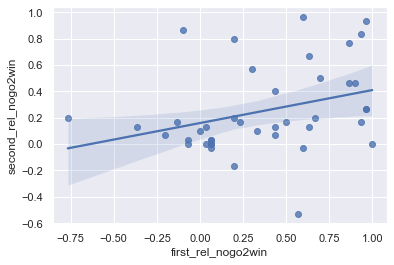

In [72]:
sns.regplot(x = all_performance.first_rel_nogo2win, y = all_performance.second_rel_nogo2win)

# No Go to Avoid Punishment Conditions

### Absolute performance

In [78]:
test_res = stats.pearsonr(all_performance.nogo2avoidPun_first_session, all_performance.nogo2avoidPun_second_session)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.551984200470278
p-value:  0.00018307491874388861


<AxesSubplot:xlabel='nogo2avoidPun_first_session', ylabel='nogo2avoidPun_second_session'>

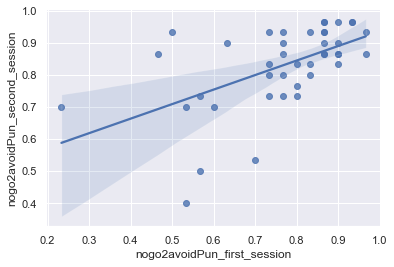

In [79]:
sns.regplot(x = all_performance.nogo2avoidPun_first_session, y = all_performance.nogo2avoidPun_second_session)

### Relative

In [81]:
test_res = stats.pearsonr(all_performance.first_rel_nogo2avoidPun, all_performance.second_rel_nogo2avoidPun)
print('correlation between relative first and second round: ', test_res[0])
print('p-value: ', test_res[1])


correlation between relative first and second round:  0.04185341768820239
p-value:  0.7950036572096056


<AxesSubplot:xlabel='first_rel_nogo2avoidPun', ylabel='second_rel_nogo2avoidPun'>

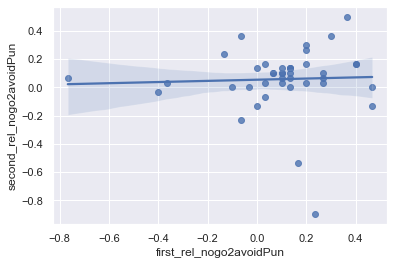

In [82]:
sns.regplot(x = all_performance.first_rel_nogo2avoidPun, y = all_performance.second_rel_nogo2avoidPun)

# First and Second difference

In [170]:
performance_difference = all_performance[['go2avoidPun_second_session', 'go2win_second_session','nogo2avoidPun_second_session', 'nogo2win_second_session','go2avoidPun_first_session', 'go2win_first_session',
       'nogo2avoidPun_first_session', 'nogo2win_first_session']].melt()

def extract_condition(x):
    if('nogo2avoidPun' in x):
        return 'nogo2avoidPun'
    elif('nogo2win' in x):
        return 'nogo2win'
    elif( 'go2avoidPun' in x):
        return 'go2avoidPun'
    elif( 'go2win' in x):
        return 'go2win'
    else:
        return 'error'

def extract_session(x):
    if('first' in x):
        return 'first'
    elif('second' in x):
        return 'second'
    else:
        return 'error'

performance_difference['condition'] = performance_difference.variable.apply(lambda x: extract_condition(x))

performance_difference['session'] = performance_difference.variable.apply(lambda x: extract_session(x))


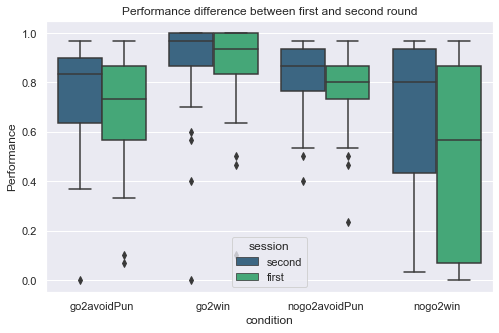

In [171]:
plt.figure(figsize=(8,5))
# sns.swarmplot(x = 'condition', y = 'value', hue = 'session', dodge=True, palette='viridis', data = performance_difference)
sns.boxplot(x = 'condition', y = 'value', hue = 'session',  palette='viridis', data = performance_difference)
plt.title('Performance difference between first and second round')
plt.ylabel('Performance')
plt.show()

# Second Hypothesis

In [306]:
Questionnare_data = pd.read_csv('Data/cleaned_questionnaire_data.csv', index_col= 0)
Questionnare_data.columns = ['mturkID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', 'weight', 'heightfeet', 'heightinch', 'pet-1',
       'pet-type', 'pet-number', 'pet-timeperiod', 'pet-0']

In [307]:
Questionnare_data['has_pet'] = np.logical_not(Questionnare_data['pet-0'] == 'no') + (Questionnare_data['pet-1'] == 'yes') 

In [308]:
Questionnare_data['restraint'] = ((Questionnare_data['1']) + Questionnare_data['2'] + Questionnare_data['3'] + (Questionnare_data['4']) + (Questionnare_data['5']))/5
Questionnare_data['eating_concern'] = ((Questionnare_data['7']) + Questionnare_data['9'] + Questionnare_data['20'] + (Questionnare_data['19']) + (Questionnare_data['21']))/5
Questionnare_data['weight_concern'] = ((Questionnare_data['22']) + Questionnare_data['24'] + Questionnare_data['8'] + (Questionnare_data['25']) + (Questionnare_data['12']))/5
Questionnare_data['shape_concern'] = ((Questionnare_data['6']) + Questionnare_data['8'] + Questionnare_data['23'] + (Questionnare_data['10']) + (Questionnare_data['26']) \
    + Questionnare_data['27'] + Questionnare_data['28'] + Questionnare_data['11'])/8

Questionnare_data['global_score'] = (Questionnare_data['restraint'] + Questionnare_data['eating_concern'] + Questionnare_data['weight_concern'] + Questionnare_data['shape_concern'])/4



In [309]:
Questionnare_data['height_m'] = Questionnare_data['heightfeet'] * 0.3048 + Questionnare_data['heightinch'] * 0.0254 
Questionnare_data['weight_kg'] = Questionnare_data['weight']*0.453592
Questionnare_data['BMI'] = Questionnare_data['weight_kg']/Questionnare_data['height_m']**2

In [310]:
perf_questionnaire_data = pd.merge(Questionnare_data, all_performance, on='mturkID' )
perf_questionnaire_data['nogo2win_mean_performance'] = (perf_questionnaire_data['nogo2win_first_session'] + perf_questionnaire_data['nogo2win_second_session'])/2
# nogo2win_mean_performance

In [311]:

perf_questionnaire_data["pet-type"] = perf_questionnaire_data["pet-type"].map(lambda x: x if type(x)!=str else x.lower())

# Eating Disorder Index Vs. nogo2win Performance

### 👇 Average of performance of 2 sessions of NoGo2Win Vs. global score

<AxesSubplot:xlabel='global_score', ylabel='nogo2win_mean_performance'>

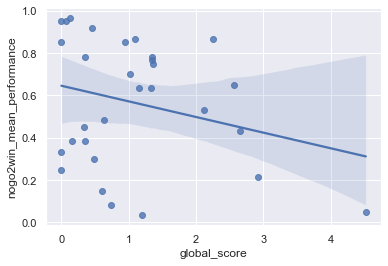

In [269]:
sns.regplot(data = perf_questionnaire_data, x = 'global_score', y = 'nogo2win_mean_performance' )

In [270]:
test_res = stats.pearsonr(perf_questionnaire_data.global_score, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between eating disorder index and   -0.26653252395961935
p-value:  0.15452409972619344


### 👆 by correcting some computation the p-value increased 

1. mean_nogo2win replaced with first_nogo2win

### OLS regression

In [271]:
smf.ols(formula = 'nogo2win_mean_performance ~ global_score', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.071
Model:                                   OLS   Adj. R-squared:                  0.038
Method:                        Least Squares   F-statistic:                     2.141
Date:                       Sat, 11 Dec 2021   Prob (F-statistic):              0.155
Time:                               17:25:22   Log-Likelihood:                -4.3780
No. Observations:                         30   AIC:                             12.76
Df Residuals:                             28   BIC:                             15.56
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6456      0.076      8.543      0.000       0.491       0.800
global_score    -0.0739      0.050     -1.463      0.155      -0.177       0.030
==============================================================================
Omnibus:                        6.908   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                2.696
Skew:                          -0.408   Prob(JB):                        0.260
Kurtosis:                       1.778   Cond. No.                         2.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multi-level regression

In [272]:
md = smf.mixedlm(formula = 'nogo2win_mean_performance ~ global_score', data = perf_questionnaire_data, groups = perf_questionnaire_data.gender_first_session)
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nogo2win_mean_performance
No. Observations: 30      Method:             REML                     
No. Groups:       2       Scale:              0.0840                   
Min. group size:  10      Likelihood:         -8.5005                  
Max. group size:  20      Converged:          Yes                      
Mean group size:  15.0                                                 
--------------------------------------------------------------------------
                 Coef.     Std.Err.      z       P>|z|    [0.025    0.975]
--------------------------------------------------------------------------
Intercept         0.646       0.086     7.535    0.000     0.478     0.814
global_score     -0.074       0.051    -1.442    0.149    -0.174     0.027
Group Var         0.000       0.040                                       



/opt/homebrew/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### 👇 First performance of NoGo2Win Vs. global score

* Please note that an individual in our data has participated in the first and third round but no second. and his data has effects on the p-value.

In [273]:
perf_questionnaire_data_for_first_round = pd.merge(Questionnare_data, first_round_perfornance, on='mturkID' )
perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round.drop_duplicates(subset = 'mturkID')
# perf_questionnaire_data_for_first_round = perf_questionnaire_data_for_first_round[perf_questionnaire_data_for_first_round.mturkID != 'A1PAY3X73PQ16S']


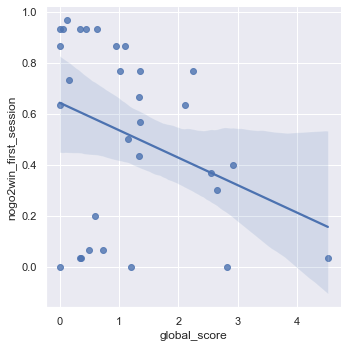

In [299]:
sns.lmplot(data = perf_questionnaire_data_for_first_round, x = 'global_score', y = 'nogo2win_first_session' )

In [275]:
smf.ols(formula = 'nogo2win_first_session ~ global_score', data = perf_questionnaire_data_for_first_round).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     nogo2win_first_session   R-squared:                       0.109
Model:                                OLS   Adj. R-squared:                  0.078
Method:                     Least Squares   F-statistic:                     3.550
Date:                    Sat, 11 Dec 2021   Prob (F-statistic):             0.0696
Time:                            17:25:28   Log-Likelihood:                -9.7478
No. Observations:                      31   AIC:                             23.50
Df Residuals:                          29   BIC:                             26.36
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6438      0.089      7.231      0.000       0.462       0.826
global_score    -0.1077      0.057     -1.884      0.070      -0.225       0.009
==============================================================================
Omnibus:                        5.223   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                3.560
Skew:                          -0.669   Prob(JB):                        0.169
Kurtosis:                       2.018   Cond. No.                         2.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
md = smf.mixedlm(formula = 'nogo2win_first_session ~ global_score', data = perf_questionnaire_data_for_first_round, groups = perf_questionnaire_data_for_first_round.gender_first_session)
mdf = md.fit()
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: nogo2win_first_session
No. Observations: 31      Method:             REML                  
No. Groups:       2       Scale:              0.1174                
Min. group size:  11      Likelihood:         -13.5934              
Max. group size:  20      Converged:          Yes                   
Mean group size:  15.5                                              
----------------------------------------------------------------------
                  Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
----------------------------------------------------------------------
Intercept          0.644      0.105    6.133   0.000    0.438    0.850
global_score      -0.108      0.060   -1.796   0.072   -0.225    0.010
Group Var          0.000      0.055                                   



/opt/homebrew/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# Gender Analysis

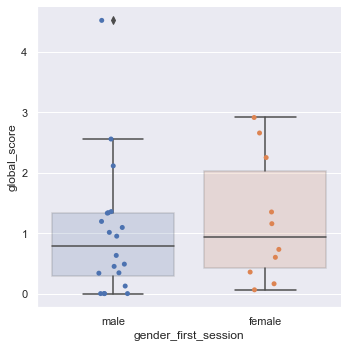

In [285]:
ax = sns.catplot(x = 'gender_first_session', y = 'global_score', data = perf_questionnaire_data)
ax = sns.boxplot(x = 'gender_first_session', y = 'global_score',boxprops=dict(alpha=.2), data = perf_questionnaire_data)

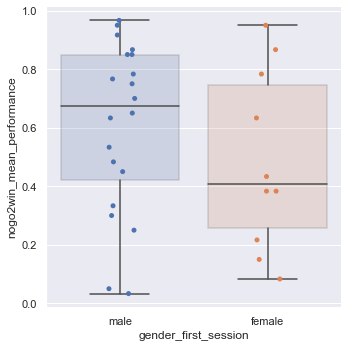

In [284]:
ax = sns.catplot(x = 'gender_first_session', y = 'nogo2win_mean_performance', data = perf_questionnaire_data)
ax = sns.boxplot(x = 'gender_first_session', y = 'nogo2win_mean_performance',boxprops=dict(alpha=.2), data = perf_questionnaire_data)

<Figure size 432x288 with 0 Axes>

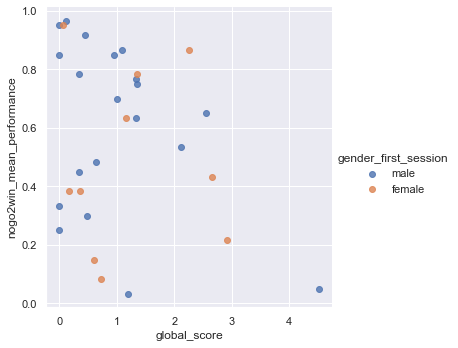

In [286]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="global_score", data=perf_questionnaire_data, fit_reg=False, hue='gender_first_session', legend=True)
# plt.title

# Age Vs. NoGo2Win Performance

<Figure size 432x288 with 0 Axes>

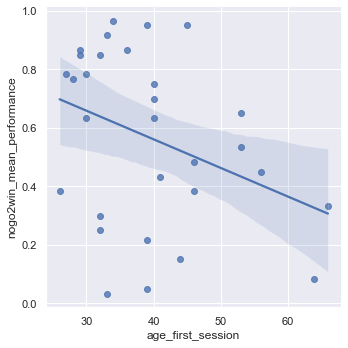

In [301]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="age_first_session", data=perf_questionnaire_data,  fit_reg=True)
# plt.title

In [294]:
smf.ols(formula = 'nogo2win_mean_performance ~ age_first_session', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.122
Model:                                   OLS   Adj. R-squared:                  0.091
Method:                        Least Squares   F-statistic:                     3.902
Date:                       Sat, 11 Dec 2021   Prob (F-statistic):             0.0582
Time:                               17:35:33   Log-Likelihood:                -3.5264
No. Observations:                         30   AIC:                             11.05
Df Residuals:                             28   BIC:                             13.86
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9515      0.202      4.722      0.000       0.539       1.364
age_first_session    -0.0098      0.005     -1.975      0.058      -0.020       0.000
==============================================================================
Omnibus:                        2.403   Durbin-Watson:                   2.382
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                2.062
Skew:                          -0.535   Prob(JB):                        0.357
Kurtosis:                       2.290   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BMI index vs. nogo2win performance

<Figure size 432x288 with 0 Axes>

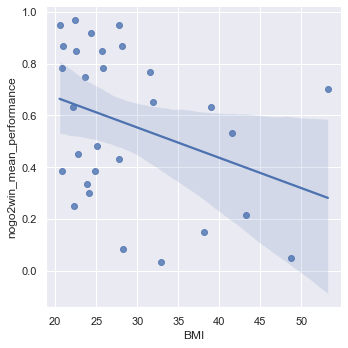

In [312]:
plt.figure()
sns.lmplot( y="nogo2win_mean_performance", x="BMI", data=perf_questionnaire_data,  fit_reg=True)
# plt.title

In [313]:
smf.ols(formula = 'nogo2win_mean_performance ~ BMI', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.119
Model:                                   OLS   Adj. R-squared:                  0.087
Method:                        Least Squares   F-statistic:                     3.766
Date:                       Sat, 11 Dec 2021   Prob (F-statistic):             0.0624
Time:                               17:47:01   Log-Likelihood:                -3.5907
No. Observations:                         30   AIC:                             11.18
Df Residuals:                             28   BIC:                             13.98
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9037      0.181      4.988      0.000       0.533       1.275
BMI           -0.0117      0.006     -1.940      0.062      -0.024       0.001
==============================================================================
Omnibus:                        8.808   Durbin-Watson:                   2.271
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                2.509
Skew:                          -0.256   Prob(JB):                        0.285
Kurtosis:                       1.679   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple linear regression 
* for the curiosity

In [320]:
smf.ols(formula = 'nogo2win_mean_performance ~ age_first_session + global_score + gender_first_session', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.204
Model:                                   OLS   Adj. R-squared:                  0.112
Method:                        Least Squares   F-statistic:                     2.220
Date:                       Sat, 11 Dec 2021   Prob (F-statistic):              0.110
Time:                               17:50:31   Log-Likelihood:                -2.0623
No. Observations:                         30   AIC:                             12.12
Df Residuals:                             26   BIC:                             17.73
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.9474      0.228      4.163      0.000       0.480       1.415
gender_first_session[T.male]     0.0785      0.109      0.719      0.478      -0.146       0.303
age_first_session               -0.0092      0.005     -1.861      0.074      -0.019       0.001
global_score                    -0.0675      0.049     -1.385      0.178      -0.168       0.033
==============================================================================
Omnibus:                        2.000   Durbin-Watson:                   2.603
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.809
Skew:                          -0.548   Prob(JB):                        0.405
Kurtosis:                       2.504   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Restraint Index Vs. nogo2win Performance

<AxesSubplot:xlabel='restraint', ylabel='nogo2win_mean_performance'>

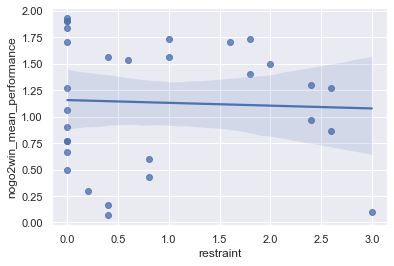

In [103]:
sns.regplot(data = perf_questionnaire_data, x = 'restraint', y = 'nogo2win_mean_performance')

In [104]:
test_res = stats.pearsonr(perf_questionnaire_data.restraint, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])


correlation between eating disorder index and   -0.04469771336329133
p-value:  0.8145706669007483


# Eating Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='eating_concern', ylabel='nogo2win_mean_performance'>

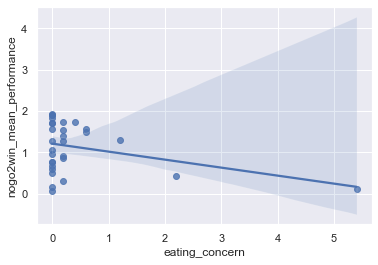

In [105]:
sns.regplot(data = perf_questionnaire_data, x = 'eating_concern', y = 'nogo2win_mean_performance')

In [203]:
smf.ols(formula = 'nogo2win_mean_performance ~ eating_concern', data = perf_questionnaire_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     nogo2win_mean_performance   R-squared:                       0.118
Model:                                   OLS   Adj. R-squared:                  0.087
Method:                        Least Squares   F-statistic:                     3.756
Date:                       Sat, 11 Dec 2021   Prob (F-statistic):             0.0628
Time:                               16:10:15   Log-Likelihood:                -24.390
No. Observations:                         30   AIC:                             52.78
Df Residuals:                             28   BIC:                             55.58
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2095      0.110     10.962      0.000       0.983       1.435
eating_concern    -0.1936      0.100     -1.938      0.063      -0.398       0.011
==============================================================================
Omnibus:                        3.331   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                2.086
Skew:                          -0.428   Prob(JB):                        0.352
Kurtosis:                       2.033   Cond. No.                         1.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Weight Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='weight_concern', ylabel='nogo2win_mean_performance'>

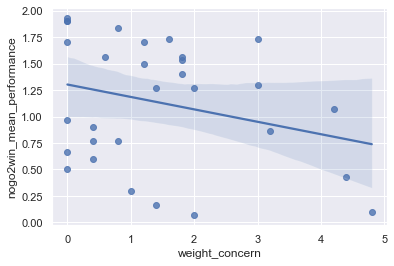

In [107]:
sns.regplot(data = perf_questionnaire_data, x = 'weight_concern', y = 'nogo2win_mean_performance')

In [108]:
test_res = stats.pearsonr(perf_questionnaire_data.weight_concern, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   -0.27675977097280535
p-value:  0.1387238996234363


# Shape Concern Index Vs. nogo2win Performance

<AxesSubplot:xlabel='shape_concern', ylabel='nogo2win_mean_performance'>

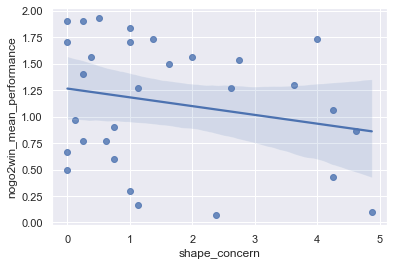

In [109]:
sns.regplot(data = perf_questionnaire_data, x = 'shape_concern', y = 'nogo2win_mean_performance')

In [110]:
test_res = stats.pearsonr(perf_questionnaire_data.shape_concern, perf_questionnaire_data.nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   -0.220069490747774
p-value:  0.24258644705673107


# Pet Analysis

# Nogo 2 Win Performance Vs. has pet?

### we have not enough data to compare these 2 groups

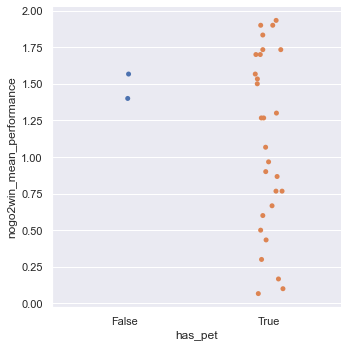

In [112]:
sns.catplot(x = 'has_pet', y = 'nogo2win_mean_performance', data = perf_questionnaire_data)

# Nogo 2 Win Performance Vs. Number of Pets

<AxesSubplot:xlabel='pet-number', ylabel='nogo2win_mean_performance'>

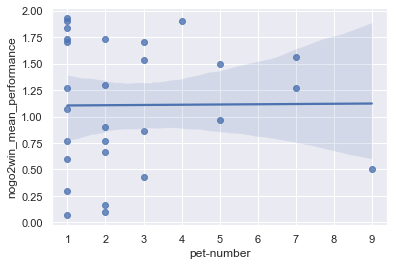

In [113]:
sns.regplot(data = perf_questionnaire_data, x = 'pet-number', y = 'nogo2win_mean_performance')

In [119]:
test_res = stats.pearsonr(perf_questionnaire_data.drop([4,27])['pet-number'], perf_questionnaire_data.drop([4,27]).nogo2win_mean_performance)
print('correlation between eating disorder index and  ', test_res[0])
print('p-value: ', test_res[1])

correlation between eating disorder index and   0.008093071450305522
p-value:  0.9673974584029452


In [120]:
def clean_pet_type(pet_type):
    if all(x in pet_type for x in ['cat', 'dog']):
        return "both"
    elif('dog' in pet_type):
        return "dog"
    elif('cat' in pet_type):
        return "cat"
    else:
        return ""


In [122]:
perf_questionnaire_data_has_pet = perf_questionnaire_data.drop([4,27])

In [123]:
perf_questionnaire_data_has_pet["pet-type"] = perf_questionnaire_data_has_pet["pet-type"].map(lambda x: clean_pet_type(x))

# Nogo 2 Win Performance Vs. pet type

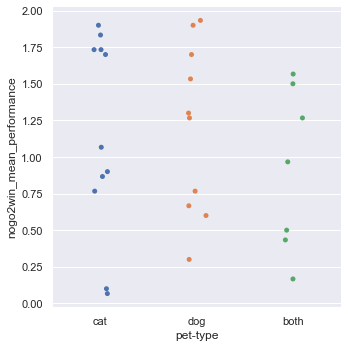

In [125]:
sns.catplot(x = 'pet-type', y = 'nogo2win_mean_performance', data = perf_questionnaire_data_has_pet)